In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('./Dataset/AirQuality.csv',sep=";", decimal=",",header=0)

In [20]:
df.sample(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
3984,23/08/2004,18.00.00,1.5,951.0,-200.0,7.4,875.0,51.0,856.0,68.0,1406.0,600.0,34.9,20.9,1.1463,NaN,NaN
973,20/04/2004,07.00.00,-200.0,1430.0,-200.0,20.7,1316.0,-200.0,638.0,-200.0,2069.0,1382.0,11.0,77.4,1.0135,NaN,NaN
9158,27/03/2005,08.00.00,1.1,1068.0,-200.0,3.6,688.0,152.0,725.0,78.0,1289.0,926.0,15.2,71.5,1.2228,NaN,NaN
3482,02/08/2004,20.00.00,1.7,1079.0,-200.0,11.8,1042.0,87.0,697.0,116.0,1773.0,846.0,30.5,38.2,1.6376,NaN,NaN
1861,27/05/2004,07.00.00,-200.0,1413.0,-200.0,24.8,1424.0,-200.0,739.0,-200.0,2102.0,1544.0,17.0,46.0,0.8830,NaN,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [24]:
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [28]:
df.drop(columns=['Unnamed: 15', 'Unnamed: 16'],inplace=True)

In [30]:
df.isnull().mean()*100

Date             1.203674
Time             1.203674
CO(GT)           1.203674
PT08.S1(CO)      1.203674
NMHC(GT)         1.203674
C6H6(GT)         1.203674
PT08.S2(NMHC)    1.203674
NOx(GT)          1.203674
PT08.S3(NOx)     1.203674
NO2(GT)          1.203674
PT08.S4(NO2)     1.203674
PT08.S5(O3)      1.203674
T                1.203674
RH               1.203674
AH               1.203674
dtype: float64

In [38]:
cols = [i for i in df.columns if df[i].isnull().mean() < 0.05 and df[i].isnull().mean() > 0]
cols

['Date',
 'Time',
 'CO(GT)',
 'PT08.S1(CO)',
 'NMHC(GT)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

In [40]:
len(df[cols].dropna()) / len(df)*100

98.79632562559392

In [44]:
df_changed = df[cols].dropna()
df_changed

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [48]:
df_changed.shape, df.shape

((9357, 15), (9471, 15))

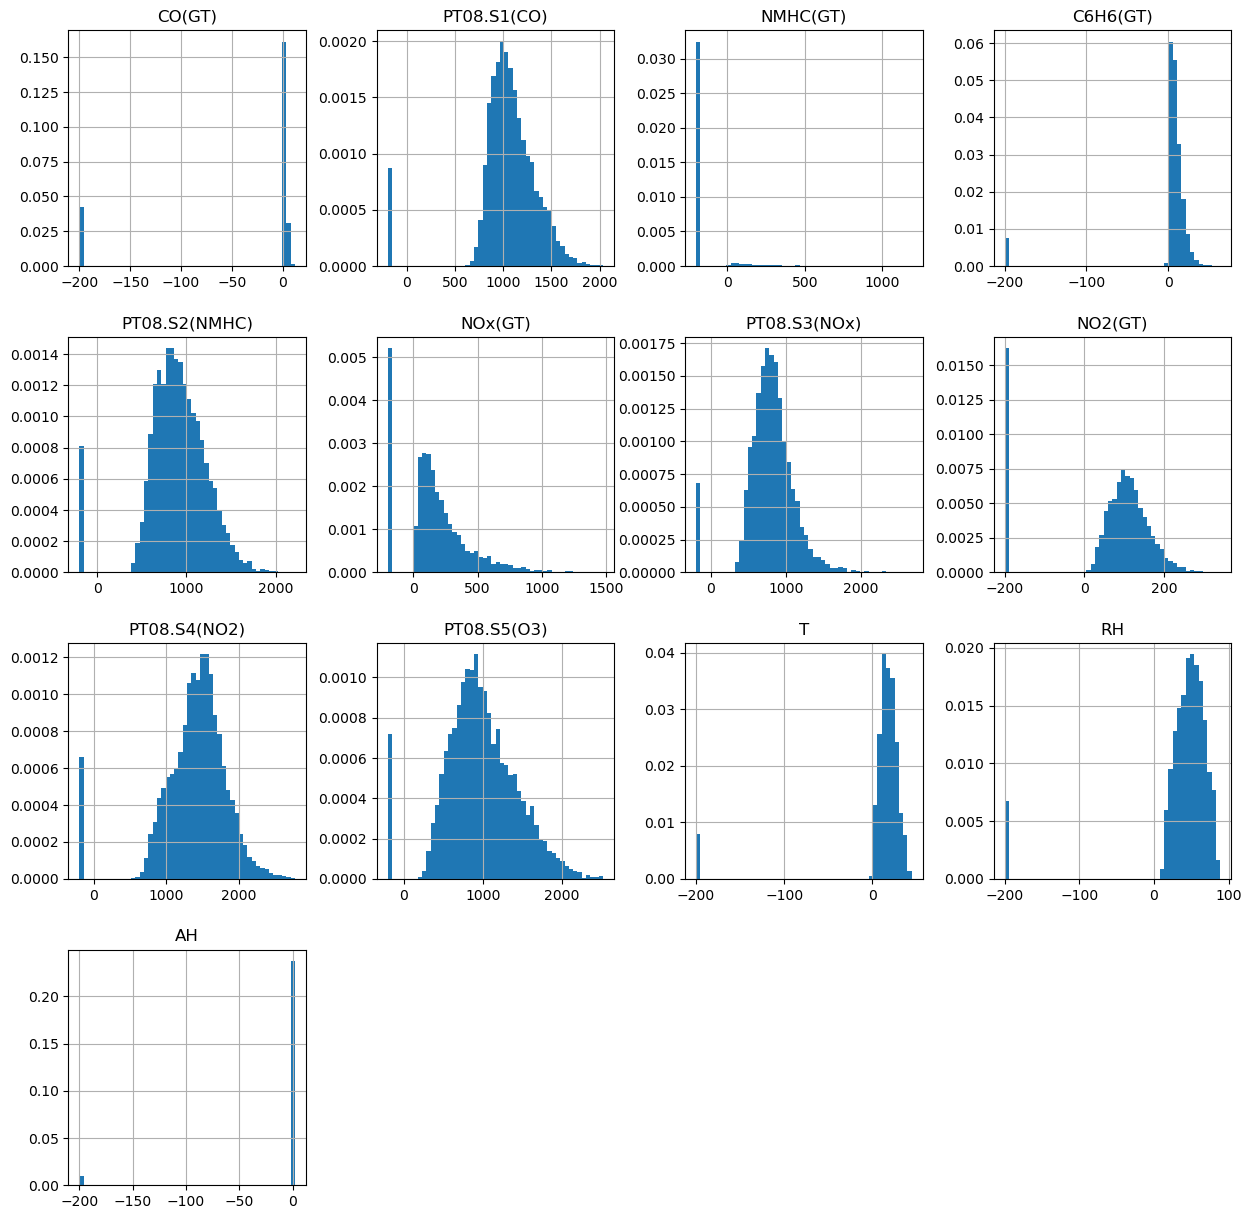

In [50]:
df_changed.hist(bins=50, density = True, figsize=(15,15))
plt.show()

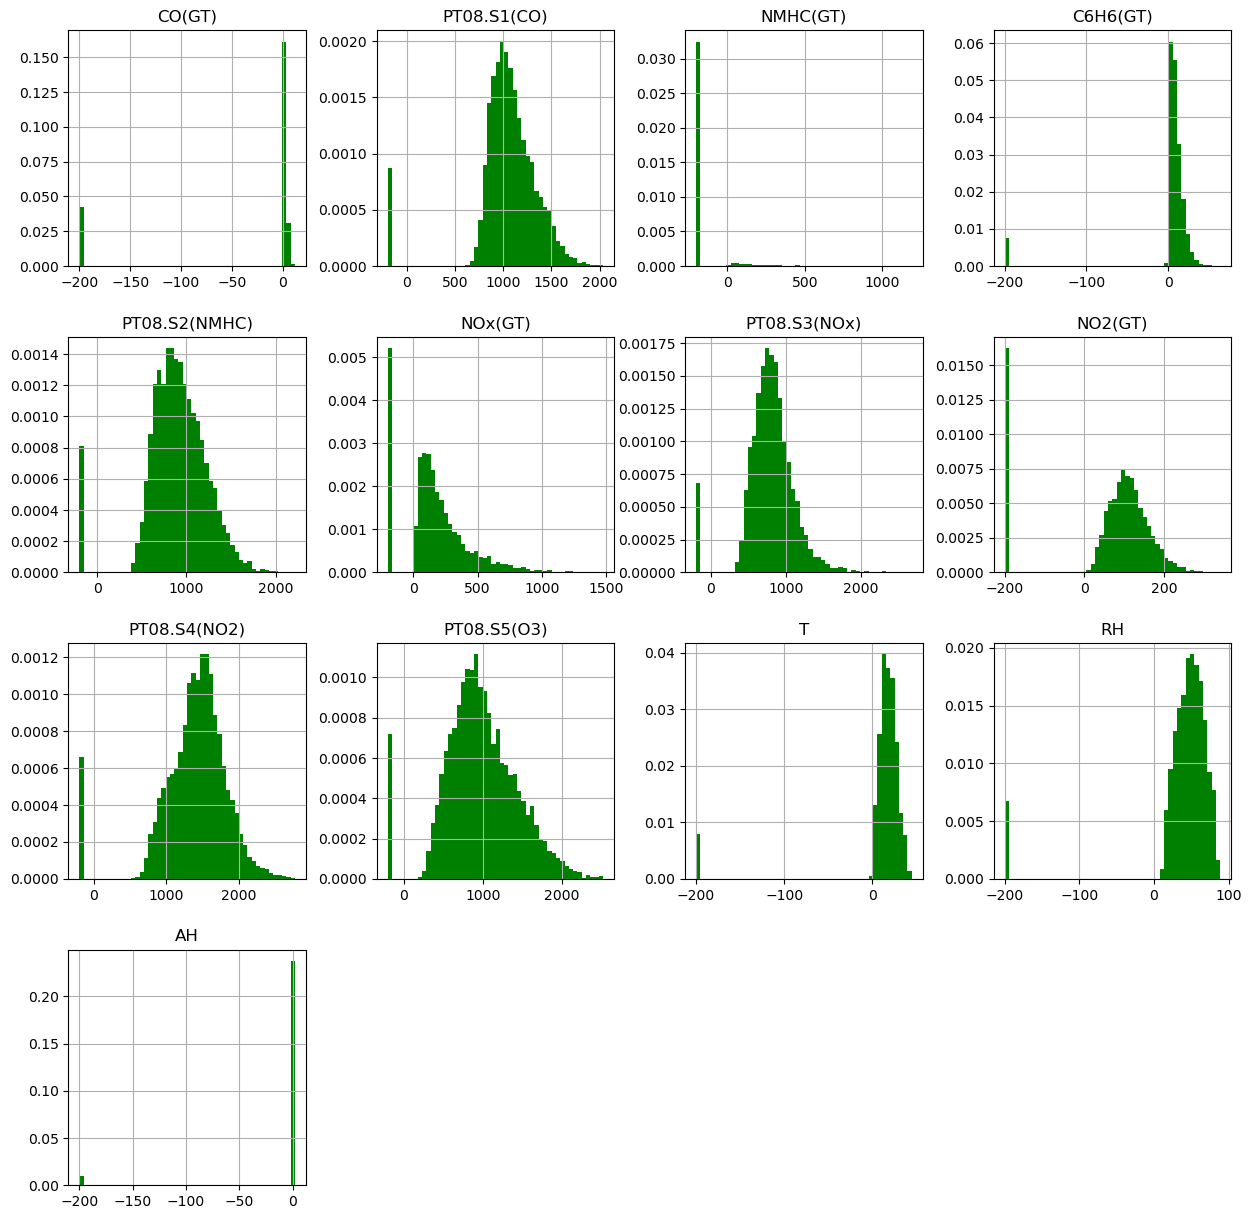

In [56]:
df.hist(bins=50, density = True, figsize=(15,15), color = 'green')
plt.show()

<Axes: >

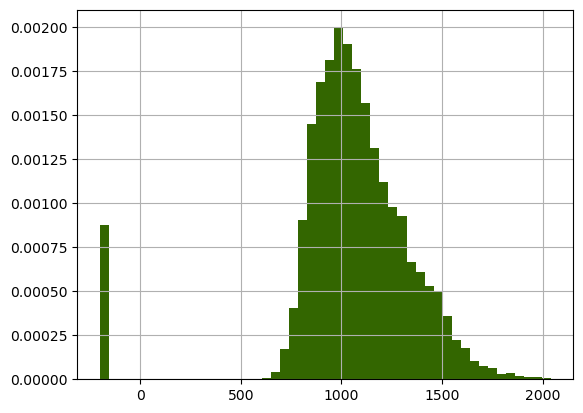

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['PT08.S1(CO)'].hist(bins=50, ax=ax, density=True, color='red')
df_changed['PT08.S1(CO)'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: >

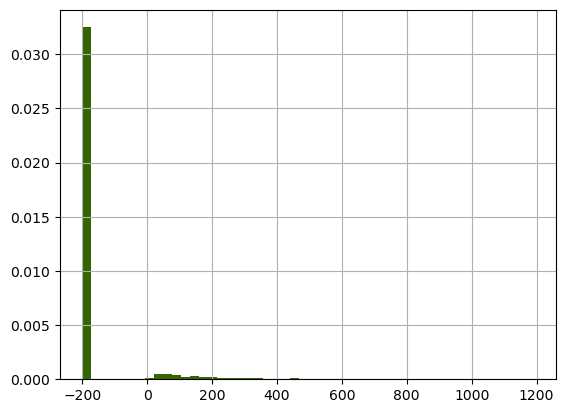

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['NMHC(GT)'].hist(bins=50, ax=ax, density=True, color='red')
df_changed['NMHC(GT)'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: >

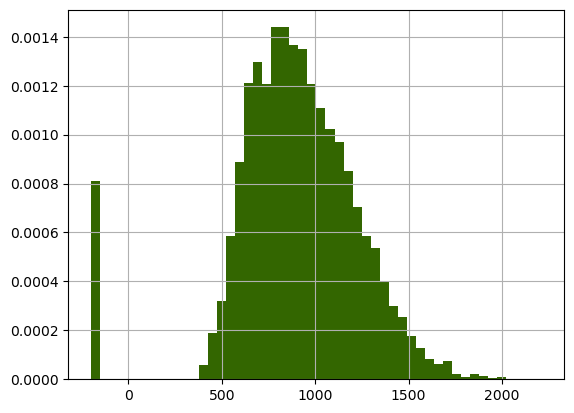

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['PT08.S2(NMHC)'].hist(bins=50, ax=ax, density=True, color='red')
df_changed['PT08.S2(NMHC)'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)